# Principal Component Analysis

In this exercise sheet we look into how to compute and apply a Principal Component Analysis (PCA).

In [1]:
import numpy as np
import numpy.matlib
import mllab.pca
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import multiprocessing as mp

### Task 3.1 - PCA Implementation

Implement the `pca()` function below using either a singular value decomposition or an eigenvector decomposition.

In [3]:
def pca(x, q):
    """
    Compute principal components and the coordinates.
    
    Parameters
    ----------
    
    x: (n, d) NumPy array
    q: int
       The number of principal components to compute.
       Has to be less than `p`.

    Returns
    -------
    
    Vq: (d, q) NumPy array, orthonormal vectors (column-wise)
    xq: (n, q) NumPy array, coordinates for x (row-wise)
    """
    # You code goes here
    x_n = x-np.mean(x,axis=0)
    w, v = np.linalg.eigh(np.dot(x_n.T,x_n))
    Vq = v[:,x.shape[1]-q:]
    xq = np.dot(Vq.T,(x_n).T).T
    return Vq, xq

### Task 3.2 - Toy 4D Example

We start by loading our toy example. The data is stored as a Numpy array, it is a $2585\times 5$ matrix. The last component of each row is the label, the first four components are the coordinates in 4D. Each label is an integer from  $\{0, 1, 2, 3, 4\}$.

The data contains a noisy 2D plane which is embded into 4D. We would like to represent the data in its _intrinsic_ 2D form.

In [4]:
import numpy as np
import mllab.pca

pca_toy_4d = np.load("data/pca_toy_4d.npy")
x = pca_toy_4d[:, :-1]  # 4D coordinates
y = pca_toy_4d[:, -1]  # labels

**Let us plot slices from this 4D data.**

We provide a helper function for this:

In [6]:
# Show documentation
mllab.pca.plot_toy_slice?

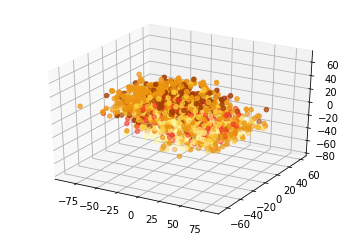

In [5]:
# Your code goes here
mllab.pca.plot_toy_slice(x,y,2)

We want to remove the noise and recover the 2D information.

**PCA transformation for $q=2$, and plot.**

Now we can compute the 2D dimensional representation of `x` using PCA.

In [7]:
# Compute transformation
Vq, xq = pca(x,2)

And then plot the coordinates, which are two dimensional. We provide a helper function for this task. Let us check how to use it:

In [ ]:
mllab.pca.plot_toy_2d?

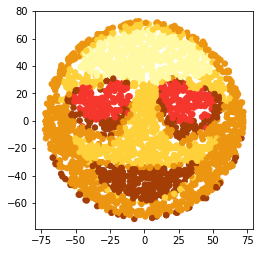

array([[ 64.48531131,  19.64873417],
       [-71.59642019, -12.65364158],
       [-18.30057618, -66.35087369],
       ...,
       [-13.85268789,  68.82870464],
       [-35.7436977 , -27.05909592],
       [ 26.27779499, -49.71007271]])

In [8]:
# Plot
mllab.pca.plot_toy_2d(xq, y)

Hopefully you appreciate the result.

**Check non-linear transformation.**

Let us see how PCA handles a non-linear transformation. To test this we map our data into 3D by keeping the y-axis as the new z-axis and bending x-coordinate onto an ellipse.

In [ ]:
mllab.pca.map_on_ellipse?

In [9]:
# Map on ellipse in 3D using mallab.pca.map_on_ellipse
num_samples = 5
axis1 = np.random.rand(num_samples)*6+1
degrees = np.random.randint(360, size=num_samples)

xq_transformed = np.zeros((num_samples, xq.shape[0], 3))
for i in range(num_samples):
    xq_transformed[i] = mllab.pca.map_on_ellipse(xq,axis1[i],1.0,degrees[i])

In [1]:
mllab.pca.plot_toy_3d?

Object `mllab.pca.plot_toy_3d` not found.


In [1]:
%matplotlib notebook
# Plot 3D using mllab.pca.plot_toy_3d
for i in range(num_samples):
    mllab.pca.plot_toy_3d(xq_transformed[i],y)

NameError: name 'num_samples' is not defined

**(Remeber to stop the interactive plot by pressing the shutdown icon!)**

Now apply PCA to our transformed data and plot the result as before.

Angle=106, a=3.9859645142602376


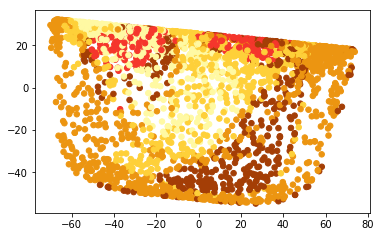

Angle=36, a=2.5525336117298636


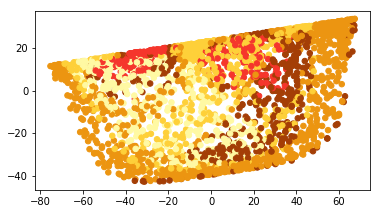

Angle=162, a=3.664205864543701


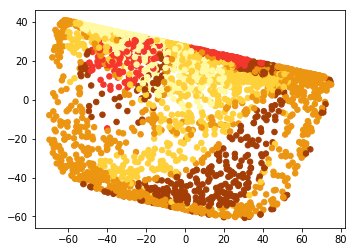

Angle=316, a=2.766713761645529


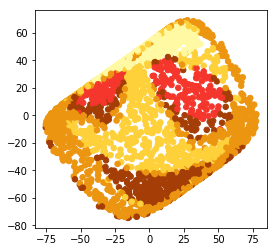

Angle=20, a=1.3917605100589097


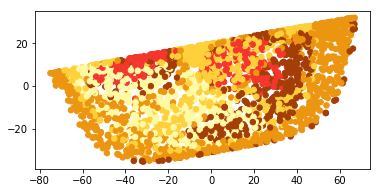

In [11]:
%matplotlib inline
# Transform back to 2D
for i in range(num_samples):
    Vq, xq = pca(xq_transformed[i], 2)
    print("Angle={}, a={}".format(degrees[i], axis1[i]))
    mllab.pca.plot_toy_2d(xq,y)
# Plot with mllab.pca.plot_toy_2d

Could be worse, but undeniably discomforting. Try different axes lengths and gap sizes of the ellipse. What do you observe?



### Task 3.3 - PCA on Iris

First compute the singular values of the Iris dataset, then check how many percent of the variance the first two principal components capture.

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_x = iris['data']
iris_y = iris['target']

In [13]:
# Compute singular values
s = np.linalg.svd(iris_x, full_matrices=False, compute_uv = False)

# Plot captured variance for q=1,2
print(s[0]*s[0]/np.dot(s,s))
print(np.dot(s[:2],s[:2])/np.dot(s,s))

0.9654296885622257
0.9983676589194722


**Plot 2D PCA.**

Now apply PCAFalse and compute the first two principal components. Plot the projected 2D data in a scatter plot such that the three labels are recognizable. What do you observe?

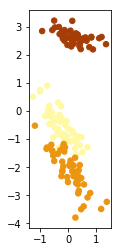

array([[ 0.32660731,  2.68420713],
       [-0.16955685,  2.71539062],
       [-0.13734561,  2.88981954],
       [-0.31112432,  2.7464372 ],
       [ 0.33392456,  2.72859298],
       [ 0.74778271,  2.27989736],
       [-0.08210451,  2.82089068],
       [ 0.17040535,  2.62648199],
       [-0.57079803,  2.88795857],
       [-0.1066917 ,  2.67384469],
       [ 0.65193501,  2.50652679],
       [ 0.02152063,  2.61314272],
       [-0.22774019,  2.78743398],
       [-0.50327991,  3.22520045],
       [ 1.1861949 ,  2.64354322],
       [ 1.34475434,  2.38386932],
       [ 0.81808967,  2.6225262 ],
       [ 0.31913667,  2.64832273],
       [ 0.87924409,  2.19907796],
       [ 0.52047364,  2.58734619],
       [ 0.39786782,  2.3105317 ],
       [ 0.44003175,  2.54323491],
       [ 0.14161557,  3.21585769],
       [ 0.10552268,  2.30312854],
       [-0.03120959,  2.35617109],
       [-0.13905634,  2.50791723],
       [ 0.13788731,  2.469056  ],
       [ 0.37468456,  2.56239095],
       [ 0.31929007,

In [14]:
# Scatter plot 2d
Vq, xq = pca(iris_x, 2)
mllab.pca.plot_toy_2d(xq,iris_y)

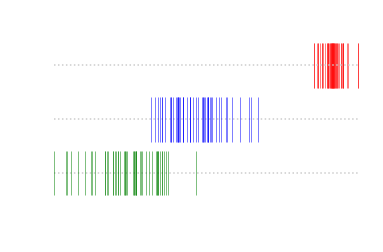

In [15]:
def plot_1d_iris(a, b, c):
    """Show a 1D plot of three 1D datasets a, b and c.
    
    Top to bottom plotted in order is a, b, c."""
    left = min(x.min() for x in (a, b, c))
    right = max(x.max() for x in (a, b, c))
    for i, (x, c) in enumerate(((a, 'red'), (b, 'blue'), (c, 'green'))):
        plt.hlines(i * .3, left, right, linestyles='dotted', colors=[(.8,.8,.8,1)])
        plt.eventplot(x, colors=c, linewidths=.5, linelengths=.25, lineoffsets=(2 - i) * .3)
    plt.axis('off')

# Plot 1d
Vq, xq = pca(iris_x, 1)
xq = xq.reshape(-1)
plot_1d_iris(xq[:50],xq[50:100],xq[100:])

**Build linear SVM classifier for Iris.**

In [20]:
# Your classifier here
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

class irisClassifier:
    def __init__(self, dim):
        self.clf1_ = LinearSVC(random_state=0)
        self.clf2_ = LinearSVC(random_state=0)
        self.dim_ = dim
        
    def fit(self, iris_x, iris_y):
        Vq, xq = pca(iris_x, self.dim_)
        self.clf1_.fit(xq, iris_y > 0.5)
        mask = self.clf1_.predict(xq)
        self.clf2_.fit(xq[mask], iris_y[mask] > 1.5)
    
    def predict(self, x):
        Vq, xq = pca(x, self.dim_)
        mask = self.clf1_.predict(xq)
        prediction = mask.astype(int)
        prediction[mask] = self.clf2_.predict(xq[mask])+1
        return prediction
        
# Print accuracy on 1, 2, and 4 dimensions.
clf = irisClassifier(2)
clf.fit(iris_x,iris_y)

c = confusion_matrix(clf.predict(iris_x), iris_y)
print(c.trace()/iris_y.size)


0.9733333333333334


## Pedestrian Classification

### Task 3.4

In [21]:
input_file_path = "data/pca_ped_25x50.mat"

__Rread the file above into a NumPy array__

In [22]:
# Your code here
import scipy.io
ped_data = scipy.io.loadmat(input_file_path)

__Get the training data out__

In [23]:
# Your code here
x = np.append(ped_data['ped_train_int_25x50'].T[1:].T,ped_data['garb_train_int_25x50'].T[1:].T,axis=0)
y = np.append(ped_data['ped_train_int_25x50'].T[:1].T,ped_data['garb_train_int_25x50'].T[:1].T)

x_test = np.append(ped_data['ped_test_int_25x50'].T[1:].T,ped_data['garb_test_int_25x50'].T[1:].T,axis=0)
y_test = np.append(ped_data['ped_test_int_25x50'].T[:1].T,ped_data['garb_test_int_25x50'].T[:1].T)

__Normalize the data to the range [0, 1]__

In [24]:
# Your code here
x_n = (x-np.amin(x))/(np.amax(x)-np.amin(x))
x_test_n = (x_test-np.amin(x_test))/(np.amax(x_test)-np.amin(x_test))

__Write a function to plot an image__

In [29]:
# Your code here
def plot_im(image):
    plt.imshow(image.reshape(25,50).T, cmap='gray')
    plt.show()

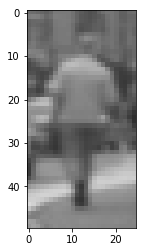

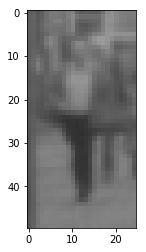

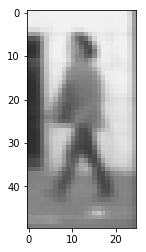

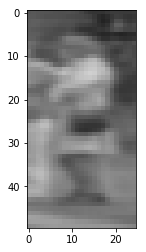

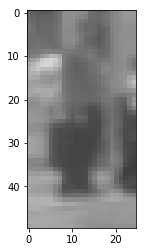

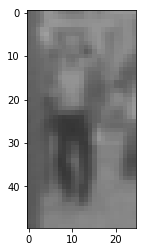

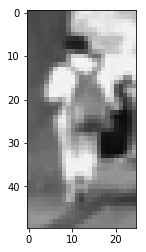

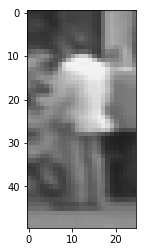

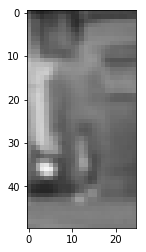

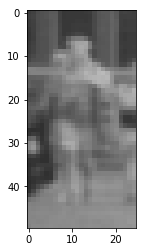

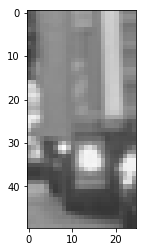

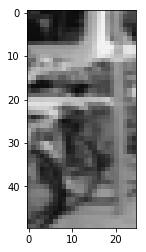

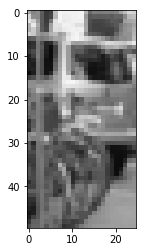

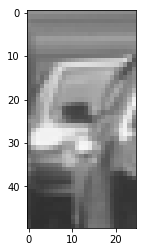

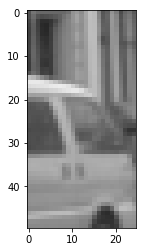

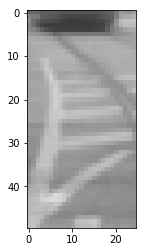

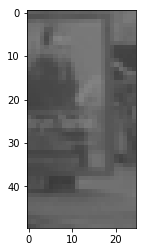

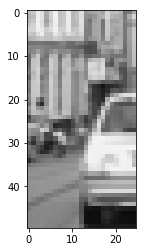

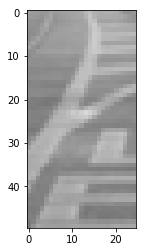

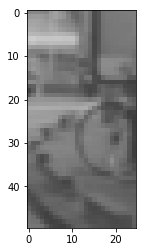

In [26]:
# Plot samples
for i in np.random.randint(0,1500,10):
    plot_im(x_n[i])
for i in np.random.randint(1500,3000,10):
    plot_im(x_n[i])

### Task 3.5 - Eigenpedestrians

In [27]:

# Compute PCA
pca = PCA(25*50)
pca.fit(x_n)

PCA(copy=True, iterated_power='auto', n_components=1250, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

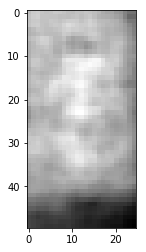

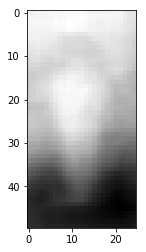

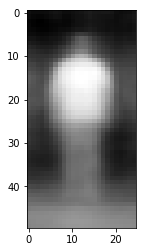

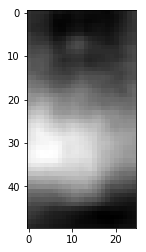

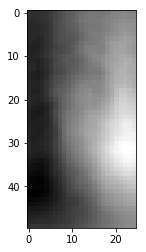

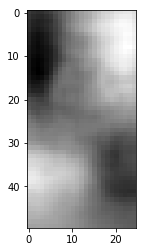

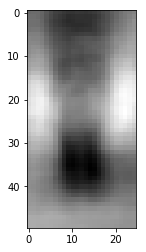

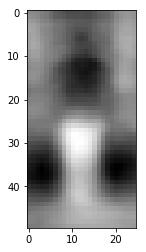

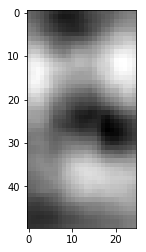

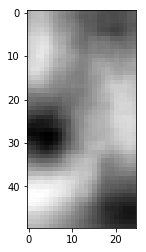

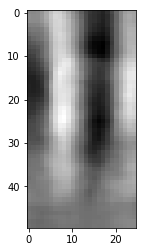

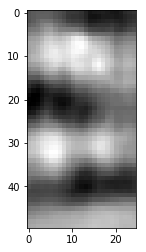

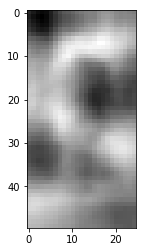

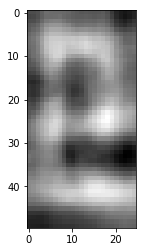

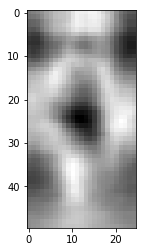

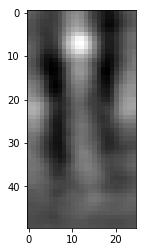

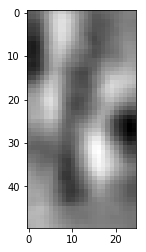

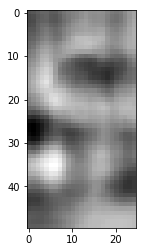

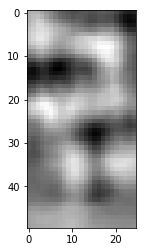

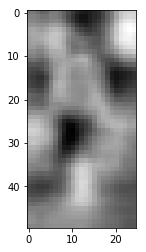

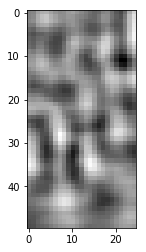

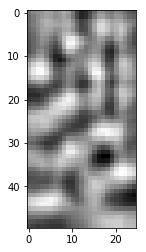

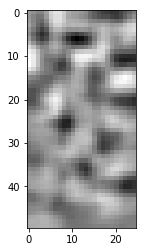

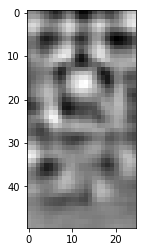

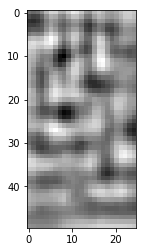

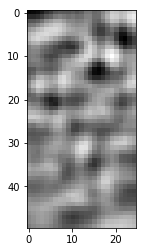

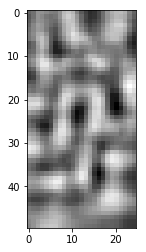

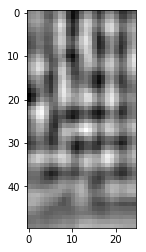

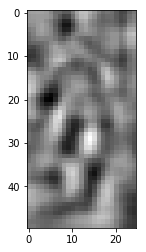

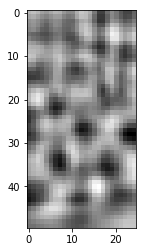

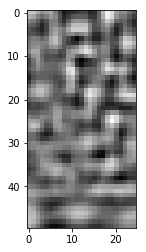

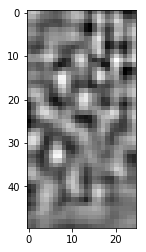

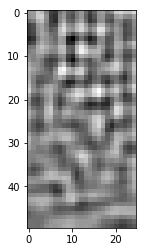

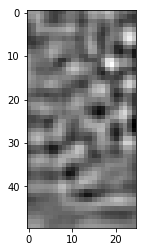

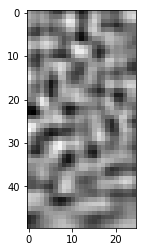

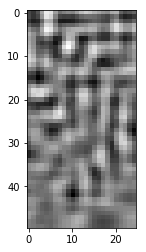

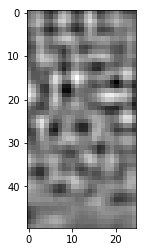

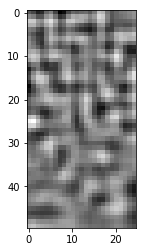

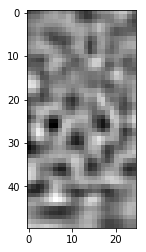

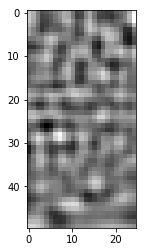

In [30]:
# Plot some eigenpedestrians

components_n = (pca.components_ - np.amin(pca.components_))/(np.amax(pca.components_)-np.amin(pca.components_))

for i in list(range(20))+list(range(50,60))+list(range(100,110)):
    plot_im(components_n[i])

### Task 3.6 - Linear SVM classifier

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import multiprocessing as mp


# Compute scores of linear SVM when using increasing q
pca = PCA(25*50)
x_transformed = pca.fit_transform(x_n)
x_test_transformed = pca.transform(x_test_n)

def fitSVM(i):
    print("Fitting model using {} principal components".format(i))
    clf = LinearSVC(random_state=0, dual=False)
    clf.fit(x_transformed[:,:i],y) 
    score_test = accuracy_score(y_test, clf.predict(x_test_transformed[:,:i]))
    score_train = accuracy_score(y, clf.predict(x_transformed[:,:i]))
    return (score_test, score_train, i)

pool = mp.Pool(processes=4)
results = pool.map(fitSVM, range(10,1250,25))

results.sort(key=lambda triple: triple[2])  

Fitting model using 10 principal components
Fitting model using 210 principal components
Fitting model using 110 principal components
Fitting model using 310 principal components
Fitting model using 35 principal components
Fitting model using 60 principal components
Fitting model using 135 principal components
Fitting model using 85 principal components
Fitting model using 160 principal components
Fitting model using 410 principal components
Fitting model using 235 principal components
Fitting model using 335 principal components
Fitting model using 185 principal components
Fitting model using 260 principal components
Fitting model using 510 principal components
Fitting model using 285 principal components
Fitting model using 360 principal components
Fitting model using 435 principal components
Fitting model using 610 principal components
Fitting model using 385 principal components
Fitting model using 460 principal components
Fitting model using 535 principal components
Fitting model 

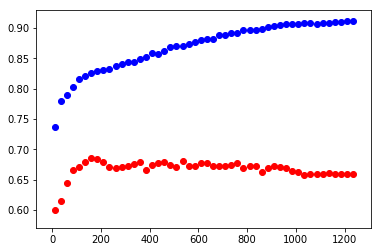

In [32]:
# Plot q vs scores
plt.scatter(list(range(10,1250,25)),[triple[0] for triple in results], c='red')
plt.scatter(list(range(10,1250,25)),[triple[1] for triple in results], c='blue')

### Task 3.7 - HOG features

In [33]:
# Implement HOG features
import hog

**To test you implementation test data is availabe.**

The array `image` is the input, and `steps` contains the values of the inner variables of the HOG algorithm.

In [ ]:
image, steps = mllab.pca.hog_test_data()


** Repeat task 3.6 with the HOG features.**

Fitting model using 100 principal components
Fitting model using 40 principal components
Fitting model using 70 principal components
Fitting model using 10 principal components
Fitting model using 50 principal components
Fitting model using 80 principal components
Fitting model using 110 principal components
Fitting model using 20 principal components
Fitting model using 30 principal components
Fitting model using 60 principal components
Fitting model using 130 principal components
Fitting model using 160 principal components
Fitting model using 90 principal components
Fitting model using 120 principal components
Fitting model using 190 principal components
Fitting model using 170 principal components
Fitting model using 140 principal components
Fitting model using 220 principal components
Fitting model using 230 principal components
Fitting model using 150 principal components
Fitting model using 180 principal components
Fitting model using 200 principal components
Fitting model using

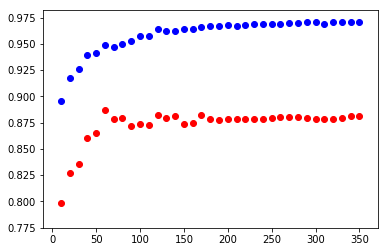

In [34]:
# Your code here
hogs = np.zeros(shape=(x_n.shape[0], 360))
hogs_test = np.zeros(shape=(x_test_n.shape[0], 360))
for i in range(x_n.shape[0]):
    hogs[i] = hog.extract(x_n[i].reshape(25,50))
for i in range(x_test_n.shape[0]) :
    hogs_test[i] = hog.extract(x_test_n[i].reshape(25,50))


pca = PCA(hogs[0].size)    
hogs_transformed = pca.fit_transform(hogs)
hogs_test_transformed = pca.transform(hogs_test)

def fitSVM(i):
    print("Fitting model using {} principal components".format(i))
    clf = LinearSVC(random_state=0, dual=False)
    clf.fit(hogs_transformed[:,:i],y) 
    score_test = accuracy_score(y_test, clf.predict(hogs_test_transformed[:,:i]))
    score_train = accuracy_score(y, clf.predict(hogs_transformed[:,:i]))
    return (score_test, score_train, i)

pool = mp.Pool(processes=4)
results = pool.map(fitSVM, range(10,360,10))

results.sort(key=lambda triple: triple[2])

plt.scatter(list(range(10,360,10)),[triple[0] for triple in results], c='red')
plt.scatter(list(range(10,360,10)),[triple[1] for triple in results], c='blue')